# 1. Why does missing data exist?
Real world data is messy data
Did you know that 72% of organizations believe that data quality issues hinder customer trust and
perception?

#### Why does missing data exist?
- Values are missed during data acquisition process
    - Faulty weather sensors during weather analysis
    - Incomplete patient information for medical diagnosis etc.
- Values deleted accidentally
    - Data loss
    - Mistakenly deleted due to human error

#### Goals
- The significance of treating missing values
- To detect missing values in your messy data
- Analyze the types for missingness
- Treat the missing values appropriately for:
    - numerical
    - time-series
    - categorical values
- To impute(replace) missing values using simple techniques
- To impute using advanced techniques
- To finally evaluate the best method of treating missing value

#### Step
1. Convert all missing values to null values.
2. Analyze the amount and type of missingness in the data.
3. Appropriately delete or impute missing values.
4. Evaluate & compare the performance of the treated/imputed dataset.

## The Problem with Missing Data
#### Why Deal with Missing Data

In [5]:
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir("data/"))

import pandas as pd
import numpy as np

['air-quality.csv', 'college.csv', 'pima-indians-diabetes.csv']


In [6]:
try:
  # Print the sum of two None's
  print("Add operation output of 'None': ", None+None)

except TypeError:
  # Print if error
  print("'None' does not support Arithmetic Operations!!")

'None' does not support Arithmetic Operations!!


In [7]:
try:
  # Print the sum of two np.nan's
  print("Add operation output of 'np.nan': ", np.nan+np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support Arithmetic Operations!!")

Add operation output of 'np.nan':  nan


In [8]:
try:
  # Print the output of logical OR of two None's
  print("OR operation output of 'None': ", None or None)

except TypeError:
  # Print if error
  print("'None' does not support Logical Operations!!")

OR operation output of 'None':  None


In [9]:
try:
  # Print the output of logical OR of two np.nan's
  print("OR operation output of 'np.nan': ", np.nan or np.nan)

except TypeError:
  # Print if error
  print("'np.nan' does not support Logical Operations!!")

OR operation output of 'np.nan':  nan


In [10]:
try:
  # Print the comparison of two 'None'
  print("'None' comparison output: ", None == None)

except TypeError:
  # Print if error
  print("'None' does not support this operation!!")

'None' comparison output:  True


In [11]:
try:
  # Print the comparison of two 'np.nan'
  print("'np.nan' comparison output: ", np.nan == np.nan)

except TypeError:
  # Print if error  
  print("'np.nan' does not support this operation!!")

'np.nan' comparison output:  False


In [12]:
try:
  # Check if 'None' is 'NaN'
  print("Is 'None' same as nan? ", np.isnan(None))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")

Function 'np.isnan()' does not support this Type!!


In [13]:
try:
  # Check if 'np.nan' is 'NaN'
  print("Is 'np.nan' same as nan? ", np.isnan(np.nan))

except TypeError:
  # Print if error
  print("Function 'np.isnan()' does not support this Type!!")

Is 'np.nan' same as nan?  True


#### Handling Missing Value

In [14]:
data = {'gradrat':[59.0, 52.0, 75.0, 56.0, 71.0], 
        'lenroll':[5.1761497326, 4.7791234931, 6.122492809500001, 5.3181199938, 5.631211781799999],
        'rmbrd':[3.75, 3.74, '.', 4.1, '.'], 'private':[1.0, 1.0, 1.0, 1.0, 1.0], 
        'stufac':[10.8, 17.7, 11.4, 11.6, 18.3],  'csat':['.', '.', 1052.0, 940.0, '.'], 
        'act':[21.0, 21.0, 24.0, 23.0, 17.0]}

college = pd.DataFrame(data)
college.to_csv("data/college.csv")

In [15]:
# Read the dataset 'college.csv'
college = pd.read_csv('data/college.csv', index_col=0)
print(college.head())

   gradrat   lenroll rmbrd  private  stufac    csat   act
0     59.0  5.176150  3.75      1.0    10.8       .  21.0
1     52.0  4.779123  3.74      1.0    17.7       .  21.0
2     75.0  6.122493     .      1.0    11.4  1052.0  24.0
3     56.0  5.318120   4.1      1.0    11.6   940.0  23.0
4     71.0  5.631212     .      1.0    18.3       .  17.0


In [16]:
# Print the info of college
print(college.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 7 columns):
gradrat    5 non-null float64
lenroll    5 non-null float64
rmbrd      5 non-null object
private    5 non-null float64
stufac     5 non-null float64
csat       5 non-null object
act        5 non-null float64
dtypes: float64(5), object(2)
memory usage: 320.0+ bytes
None


In [17]:
# Store unique values of 'csat' column to 'csat_unique'
csat_unique = college.csat.unique()

In [18]:
# Print the sorted values of csat_unique
print(np.sort(csat_unique))

['.' '1052.0' '940.0']


In [19]:
# Read the dataset 'college.csv' with na_values set to '.'
college = pd.read_csv('data/college.csv', na_values='.', index_col=0)
print(college.head())

   gradrat   lenroll  rmbrd  private  stufac    csat   act
0     59.0  5.176150   3.75      1.0    10.8     NaN  21.0
1     52.0  4.779123   3.74      1.0    17.7     NaN  21.0
2     75.0  6.122493    NaN      1.0    11.4  1052.0  24.0
3     56.0  5.318120   4.10      1.0    11.6   940.0  23.0
4     71.0  5.631212    NaN      1.0    18.3     NaN  17.0


In [20]:
# Print the info of college
print(college.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 7 columns):
gradrat    5 non-null float64
lenroll    5 non-null float64
rmbrd      3 non-null float64
private    5 non-null float64
stufac     5 non-null float64
csat       2 non-null float64
act        5 non-null float64
dtypes: float64(7)
memory usage: 320.0 bytes
None


In [21]:
diabetes = pd.read_csv('data/pima-indians-diabetes.csv')

In [22]:
# Print the description of the data
display(diabetes.describe())

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
# Store all rows of column 'BMI' which are equal to 0 
zero_bmi = diabetes.BMI[diabetes.BMI == 0]
print(zero_bmi)

Series([], Name: BMI, dtype: float64)


In [24]:
# Set the 0 values of column 'BMI' to np.nan
diabetes.BMI[diabetes.BMI == 0] = np.nan

In [25]:
# Print the 'NaN' values in the column BMI
print(diabetes.BMI[np.isnan(diabetes.BMI)])

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64


In [26]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnant             768 non-null float64
Glucose              763 non-null float64
Diastolic_BP         733 non-null float64
Skin_Fold            541 non-null float64
Serum_Insulin        394 non-null float64
BMI                  757 non-null float64
Diabetes_Pedigree    768 non-null float64
Age                  768 non-null int64
Class                768 non-null float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [27]:
diabetes.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
diabetes.BMI[diabetes.BMI == 0]

Series([], Name: BMI, dtype: float64)

In [29]:
diabetes.BMI[diabetes.BMI == 0] = np.nan
diabetes.BMI[np.isnan(diabetes.BMI)]

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

#### Analyze the amount of missingness

In [30]:
# Load the airquality dataset
airquality = pd.read_csv('data/air-quality.csv', parse_dates=['Date'], index_col='Date')

In [31]:
# Create a nullity DataFrame airquality_nullity
airquality_nullity = airquality.isnull()
print(airquality_nullity.head())

            Ozone  Solar   Wind   Temp
Date                                  
1976-05-01  False  False  False  False
1976-05-02  False  False  False  False
1976-05-03  False  False  False  False
1976-05-04  False  False  False  False
1976-05-05   True   True  False  False


In [32]:
# Calculate total of missing values
missing_values_sum = airquality_nullity.sum()
print('Total Missing Values:\n', missing_values_sum)

Total Missing Values:
 Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64


In [34]:
# Calculate percentage of missing values
missing_values_percent = airquality_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

Percentage of Missing Values:
 Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


'/usr/local/share/datasets/bar_chart.png'

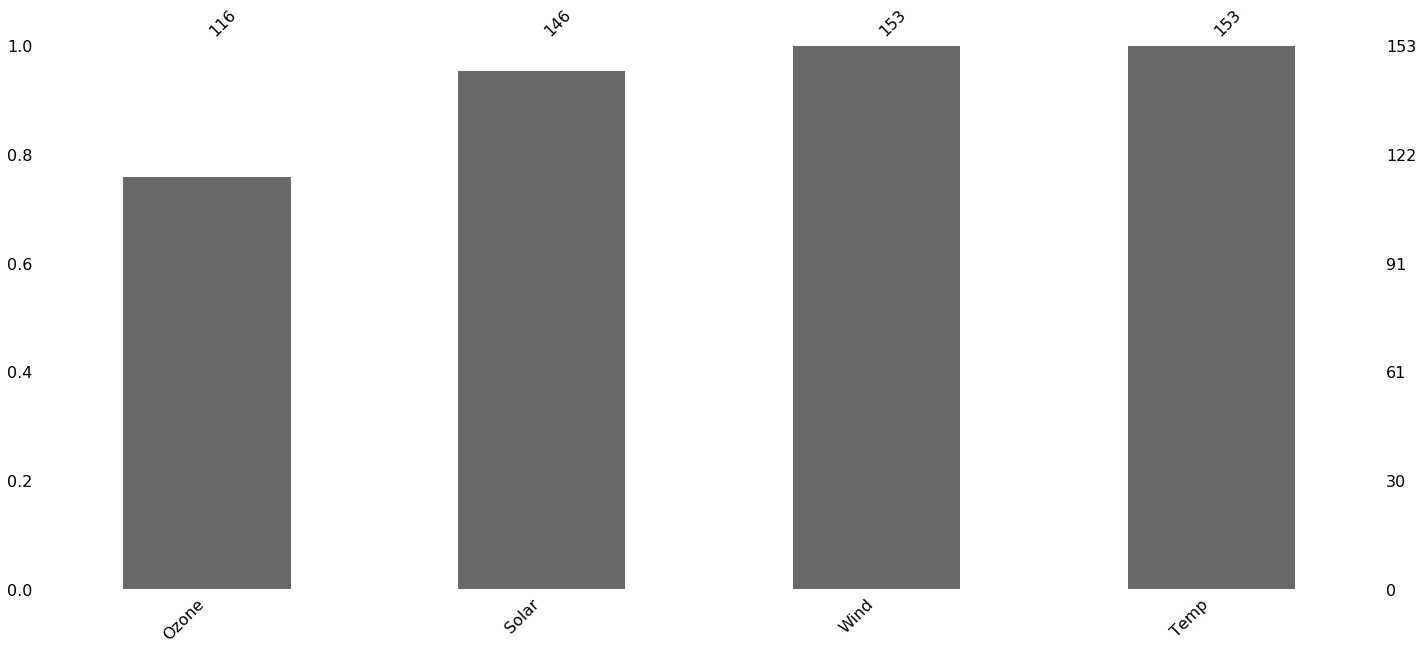

In [35]:
# Import missingno as msno
import missingno as msno

# Plot amount of missingness
msno.bar(airquality)

# Display bar chart of missing values
display("/usr/local/share/datasets/bar_chart.png")

'/usr/local/share/datasets/matrix.png'

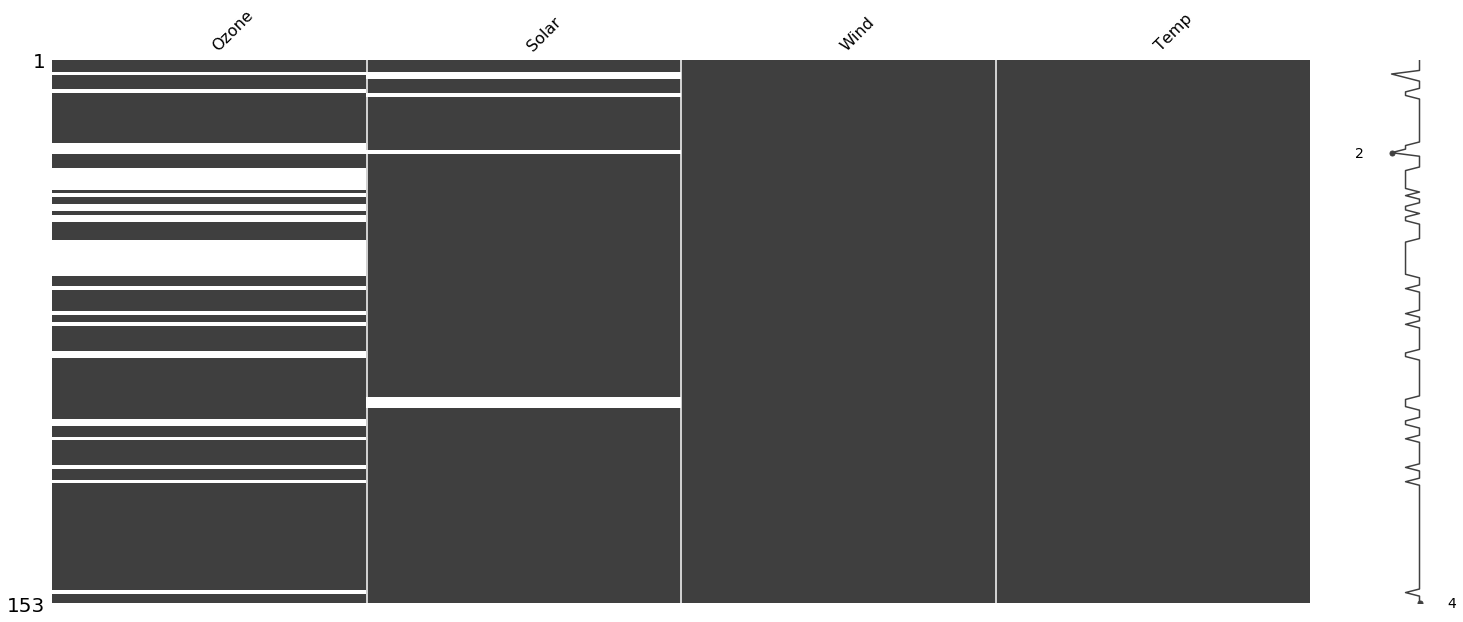

In [36]:
# Import missingno as msno
import missingno as msno

# Plot nullity matrix of airquality
msno.matrix(airquality)

# Display nullity matrix
display("/usr/local/share/datasets/matrix.png")

'/usr/local/share/datasets/matrix_frequency.png'

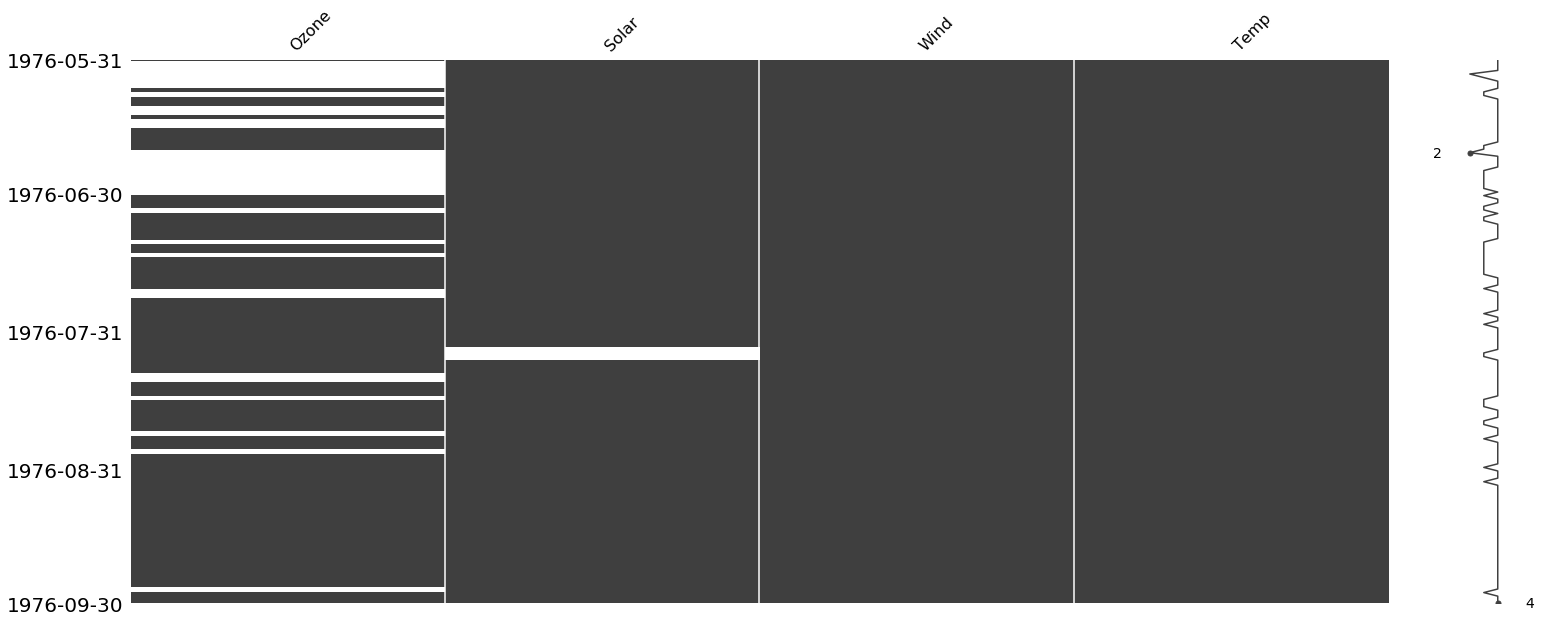

In [37]:
# Import missingno as msno
import missingno as msno

# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(airquality, freq='M')

# Display nullity matrix
display("/usr/local/share/datasets/matrix_frequency.png")

'/usr/local/share/datasets/matrix_sliced.png'

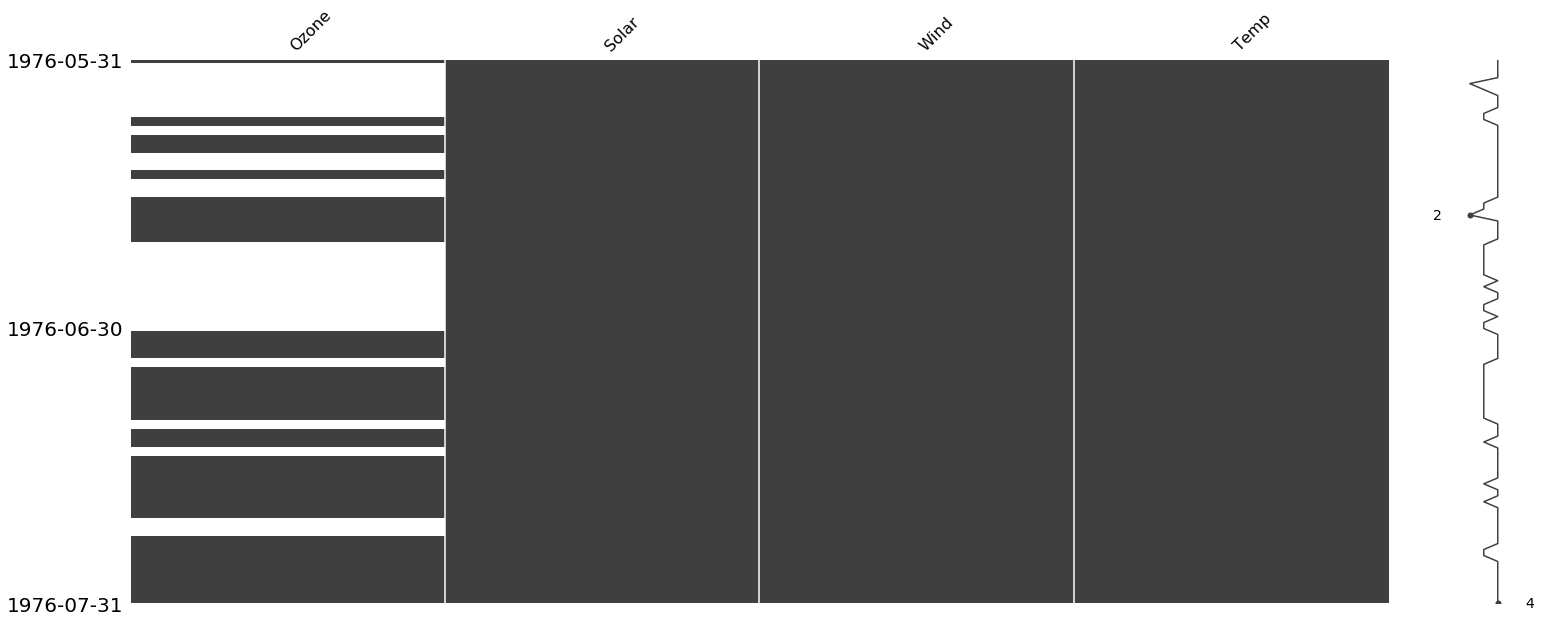

In [38]:
# Import missingno as msno
import missingno as msno

# Plot the sliced nullity matrix of airquality with frequency 'M'
msno.matrix(airquality.loc['May-1976':'Jul-1976'], freq='M')

# Display nullity matrix
display("/usr/local/share/datasets/matrix_sliced.png")

#### Summary

In this lesson we learned to analyze
- the amount of missingness numerically
- the amount of missingness graphically
- the percentage of missingness
- the nullity matrix for regular datasets
- the nullity matrix for time-series datasets

# 3. Does Missingness Have A Pattern?
#### Is the data missing at random?

#### Possible reasons for missing data
Note − (variable → data field or column in a DataFrame)
- Values simply missing at random instances or intervals in a variable
- Values missing due to another variable
- Values missing due to the missingness of the same or another variable

#### Types of missingness
1. Missing Completely at Random (MCAR)
2. Missing at Random (MAR)
3. Missing Not at Random (MNAR)

#### Missing Completely at Random(MCAR)
"Missingness has no relationship between any values, observed or missing"
<img style="width: 350px;" src="img/MCAR.png">

#### Missing at Random(MAR)
"There is a systematic relationship between missingness and other observed data, but not the missing data"
<img style="width: 350px;" src="img/MAR.png">

#### Missing not at Random(MNAR)
"There is a relationship between missingness and its values, missing or non-missing"
<img style="width: 350px;" src="img/MNAR.png">

#### MNAR - An example
Missingness pattern of the diabetes sorted by Serum_Insulin

'/usr/local/share/datasets/matrix_diabetes.png'

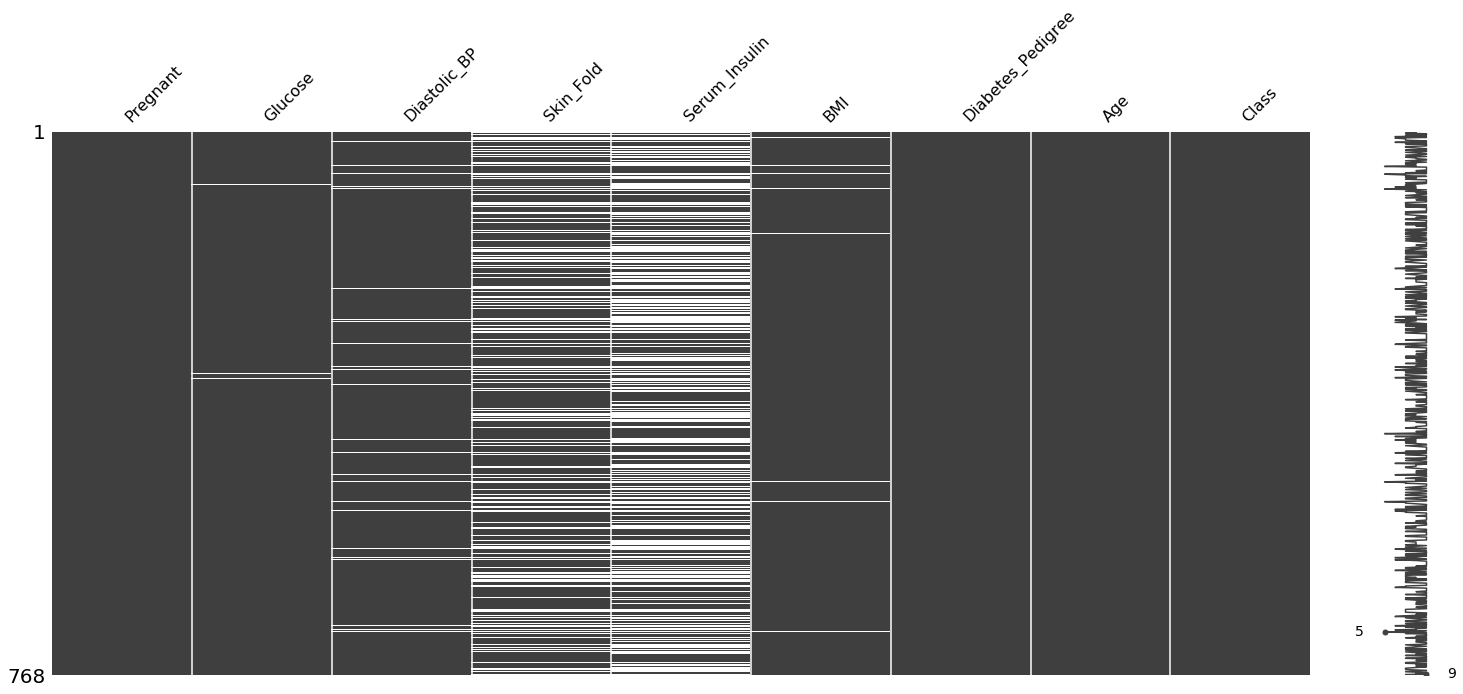

In [39]:
# Visualize the missingness summary
msno.matrix(diabetes)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_diabetes.png")

'/usr/local/share/datasets/matrix_sorted.png'

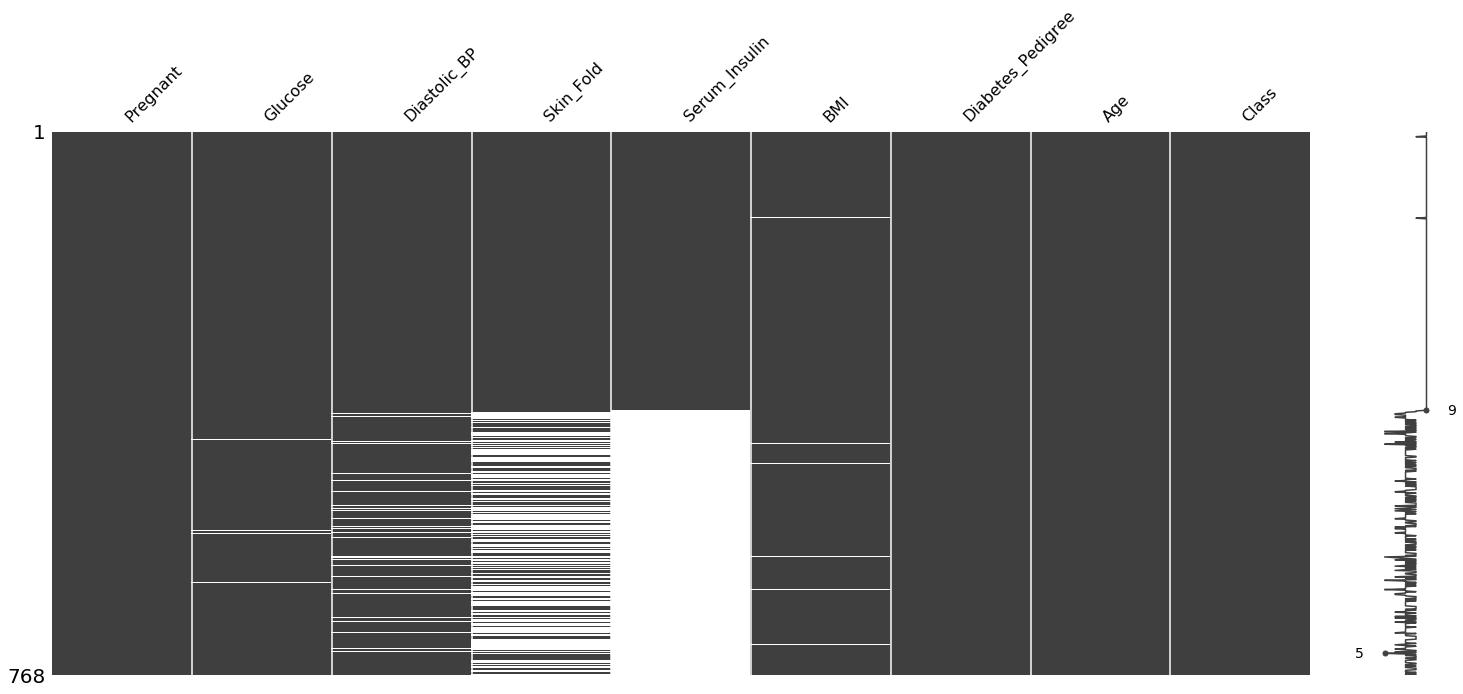

In [40]:
# Sort diabetes dataframe on 'Serum Insulin'
sorted_values = diabetes.sort_values('Serum_Insulin')

# Visualize the missingness summary of sorted
msno.matrix(sorted_values)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_sorted.png")

#### Summary
- Possible reasons for missingness
  - Missing Completely at Random (MCAR),
  - Missing at Random (MAR) or
  - Missing Not at Random (MNAR)
- Detecting missingness pattern by sorting the variables
- Mapping missingness to MCAR, MAR & MNAR

#### Finding patterns in missing data

##### Finding correlations between missingness
- Missingness heatmap or correlation map
- Missingness dendrogram

##### Missingness Heatmap
- Graph of correlation of missing values between columns
- Explains the dependencies of missingness between columns

##### Missingness Dendrogram
- Tree diagram of missingness
- Describes correlation of variables by grouping them

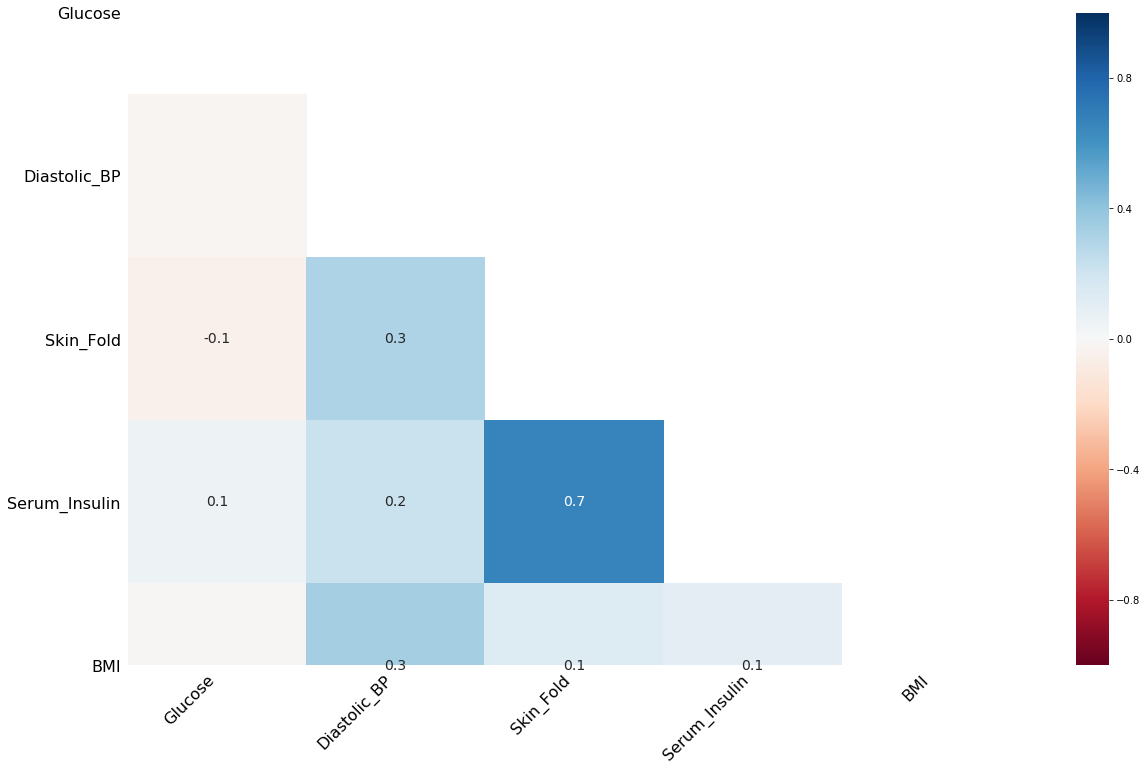

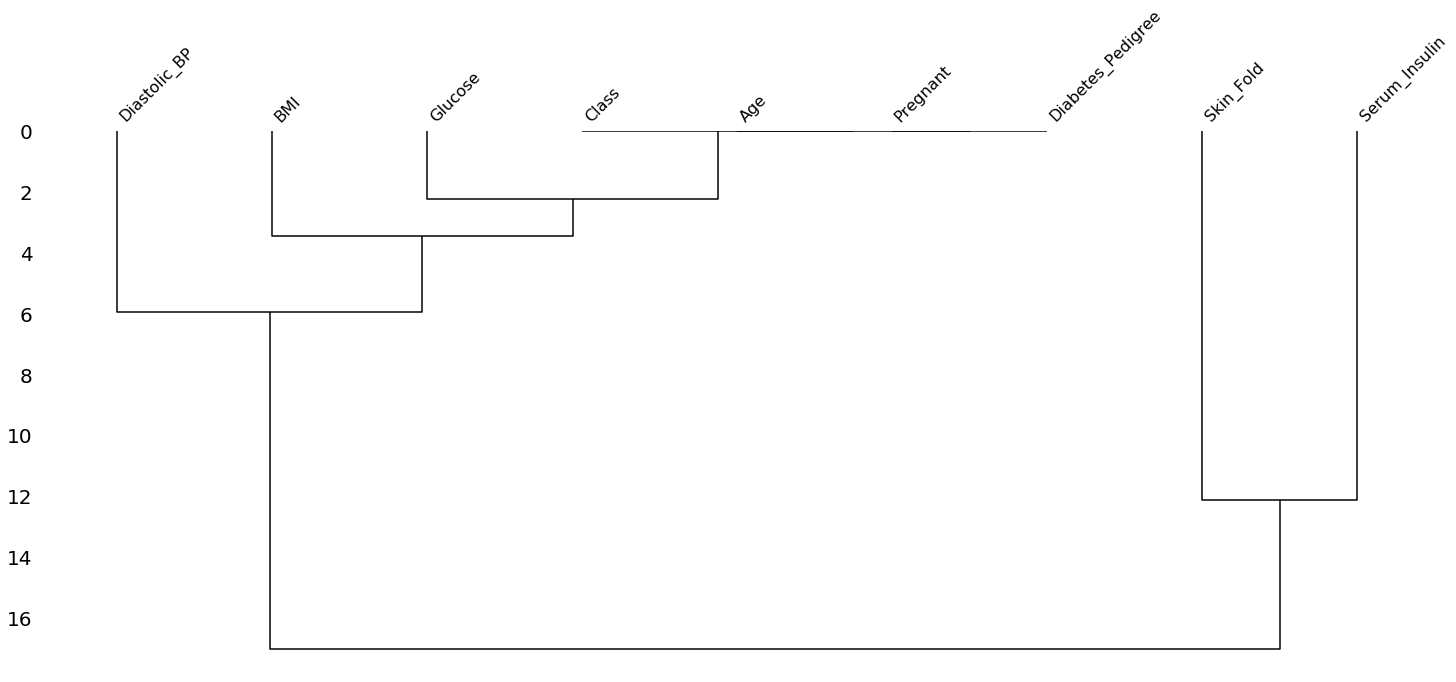

In [41]:
import matplotlib.pyplot as plt

# Plot missingness heatmap of diabetes
msno.heatmap(diabetes)

# Plot missingness dendrogram of diabetes
msno.dendrogram(diabetes)

# Show plot
plt.show()

#### Summary
- Analyze missingness heatmap
  - msno.heatmap(df)
- Analayze missingness dendrogram
  - msno.dendrogram(df)

#### Visualizing missingness across a variable

In [42]:
from numpy.random import rand

BMI_null = diabetes['BMI'].isnull()
num_nulls = BMI_null.sum()

# Generate random values
dummy_values = rand(num_nulls)

# Shift to -2 & -1
dummy_values = dummy_values - 2

# Scale to 0.075 of Column Range
BMI_range = diabetes.BMI.max() - diabetes.BMI.min()
dummy_values = dummy_values * 0.075 * BMI_range

# Shift to Column Minimum
dummy_values = (rand(num_nulls) - 2) * 0.075 * BMI_range + diabetes.BMI.min()

In [43]:
def fill_dummy_values(df, scaling_factor):
    # Create copy of dataframe
    df_dummy = df.copy(deep=True)
    # Iterate over each column
    for col in df_dummy:
    # Get column, column missing values and range
        col = df_dummy[col]
        col_null = col.isnull()
        num_nulls = col_null.sum()
        col_range = col.max() - col.min()
        # Shift and scale dummy values
        dummy_values = (rand(num_nulls) - 2)
        dummy_values = dummy_values * scaling_factor * col_range + col.min()
        # Return dummy values
        col[col_null] = dummy_values
    return df_dummy

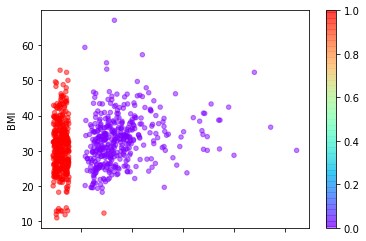

In [45]:
# Create dummy dataframe
diabetes_dummy = fill_dummy_values(diabetes, 0.075)

# Get missing values of both columns for coloring
nullity=diabetes.Serum_Insulin.isnull()+diabetes.BMI.isnull()

# Generate scatter plot
diabetes_dummy.plot(x='Serum_Insulin', y='BMI', 
                    kind='scatter', alpha=0.5, c=nullity, cmap='rainbow')

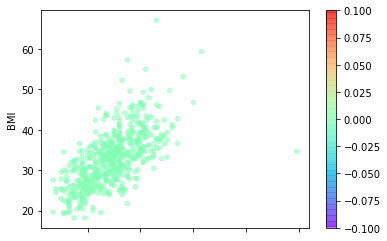

In [47]:
def fill_dummy_values(df, scaling_factor=0.075):
    df_dummy = df.copy(deep=True)
    for col in df_dummy:
        col = df_dummy[col]
        col_null = col.isnull()    
        # Calculate number of missing values in column 
        num_nulls = col_null.sum()
        # Calculate column range
        col_range = col.max() - col.min()
        # Scale the random values to scaling_factor times col_range
        dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
        col[col_null] = dummy_values
        return df_dummy
    
# Fill dummy values in diabetes_dummy
diabetes_dummy = fill_dummy_values(diabetes)

# Sum the nullity of Skin_Fold and BMI
nullity = diabetes.Skin_Fold.isnull() + diabetes.BMI.isnull()

# Create a scatter plot of Skin Fold and BMI 
diabetes_dummy.plot(x='Skin_Fold', y='BMI', kind='scatter', alpha=0.5,
                    # Set color to nullity of BMI and Skin_Fold
                    c=nullity, cmap='rainbow')

plt.show()

#### When and how to delete missing data

##### Types of deletions
1. Pairwise deletion
2. Listwise deletion

Note: Used when the values are MCAR.

##### Pairwise Deletion
<img style="width: 350px;" src="img/Pairwise Deletion.png">

In [48]:
diabetes['Glucose'].mean()

121.6867627785059

In [49]:
diabetes.count()

Pregnant             768
Glucose              763
Diastolic_BP         733
Skin_Fold            541
Serum_Insulin        394
BMI                  757
Diabetes_Pedigree    768
Age                  768
Class                768
dtype: int64

In [50]:
diabetes['Glucose'].sum() / diabetes['Glucose'].count()

121.6867627785059

###### Listwise Deletion or Complete Case
<img style="width: 350px;" src="img/Listwise Deletion or Complete Case.png">

In [51]:
diabetes.dropna(subset=['Glucose'], how='any', inplace=True)

0

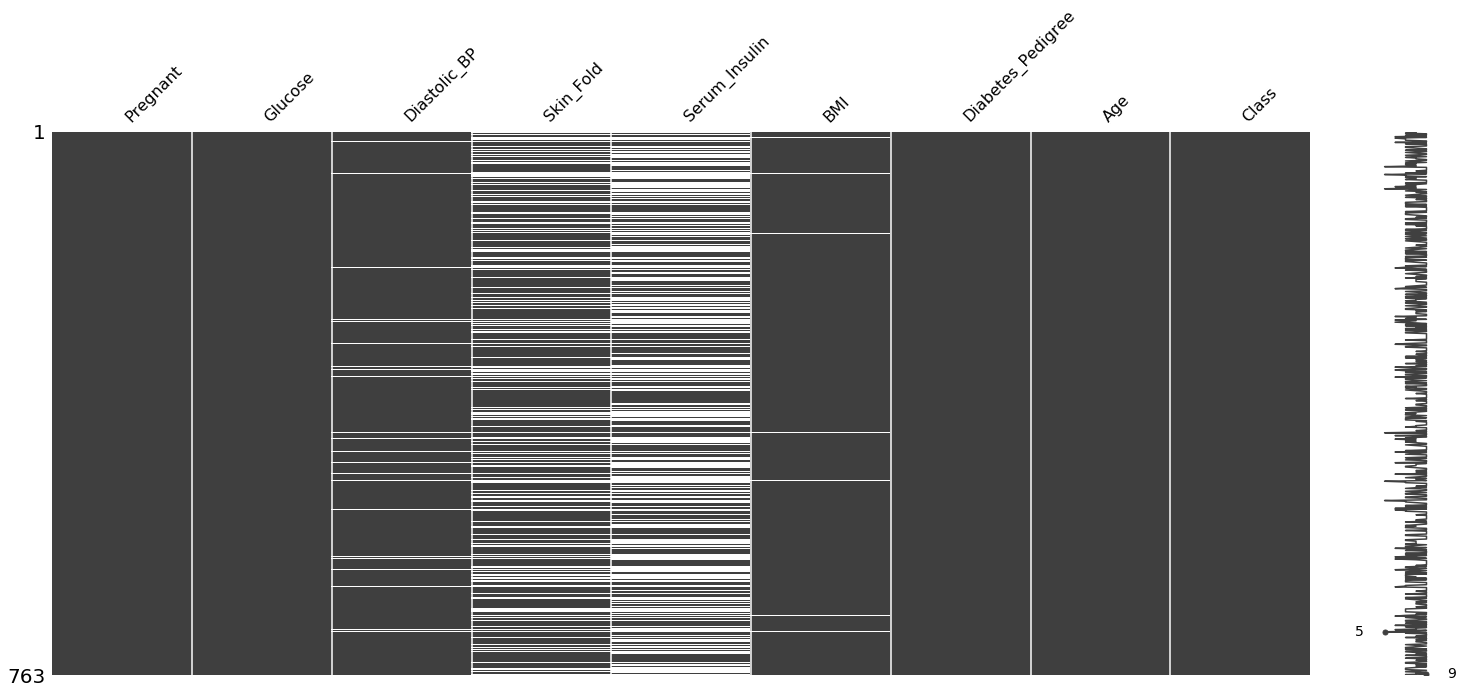

In [52]:
msno.matrix(diabetes)
diabetes['Glucose'].isnull().sum()

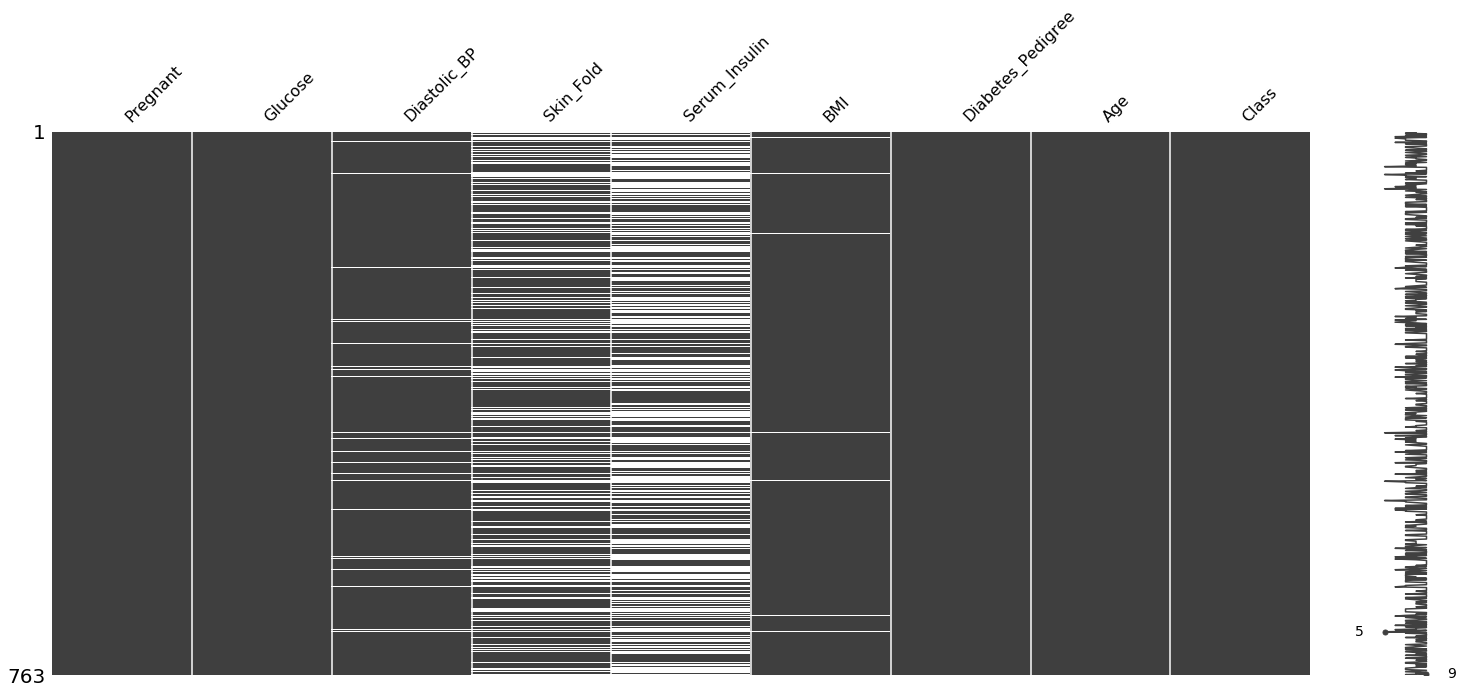

In [53]:
diabetes.dropna(subset=["Glucose"], how='all', inplace=True)
msno.matrix(diabetes)

In [54]:
diabetes['BMI'].isnull().sum()

11

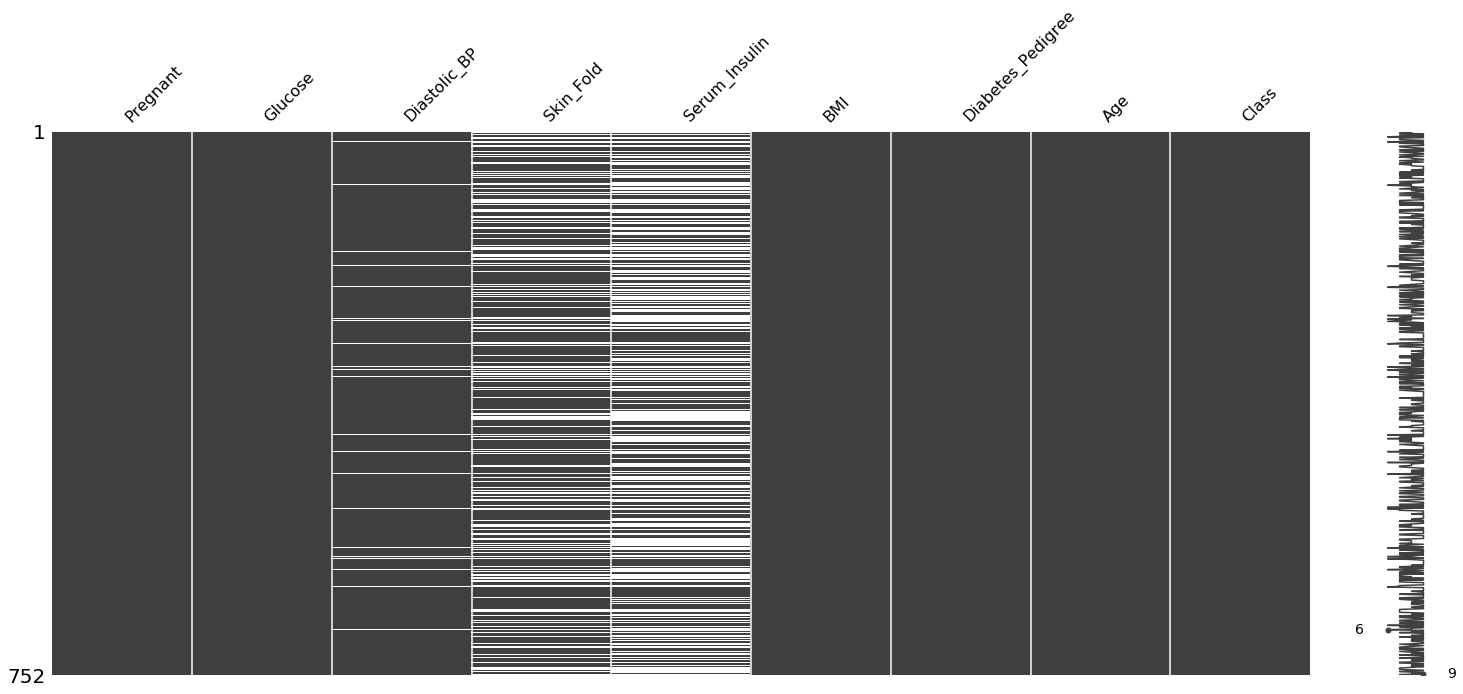

In [55]:
diabetes.dropna(subset=["BMI"], how='all', inplace=True)
msno.matrix(diabetes)

'/usr/local/share/datasets/matrix_diabetes.png'

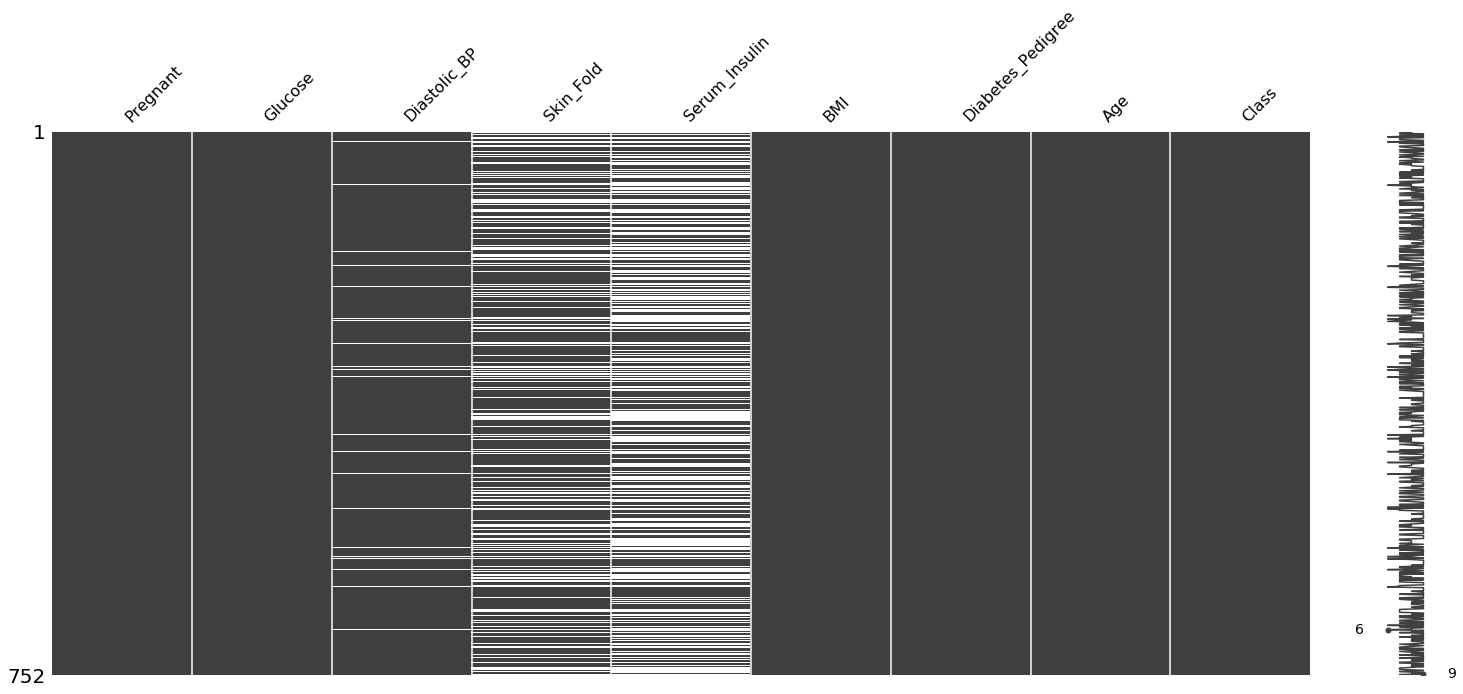

In [56]:
# Visualize the missingness of diabetes pre-dropping missing values
msno.matrix(diabetes)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_diabetes.png")

0


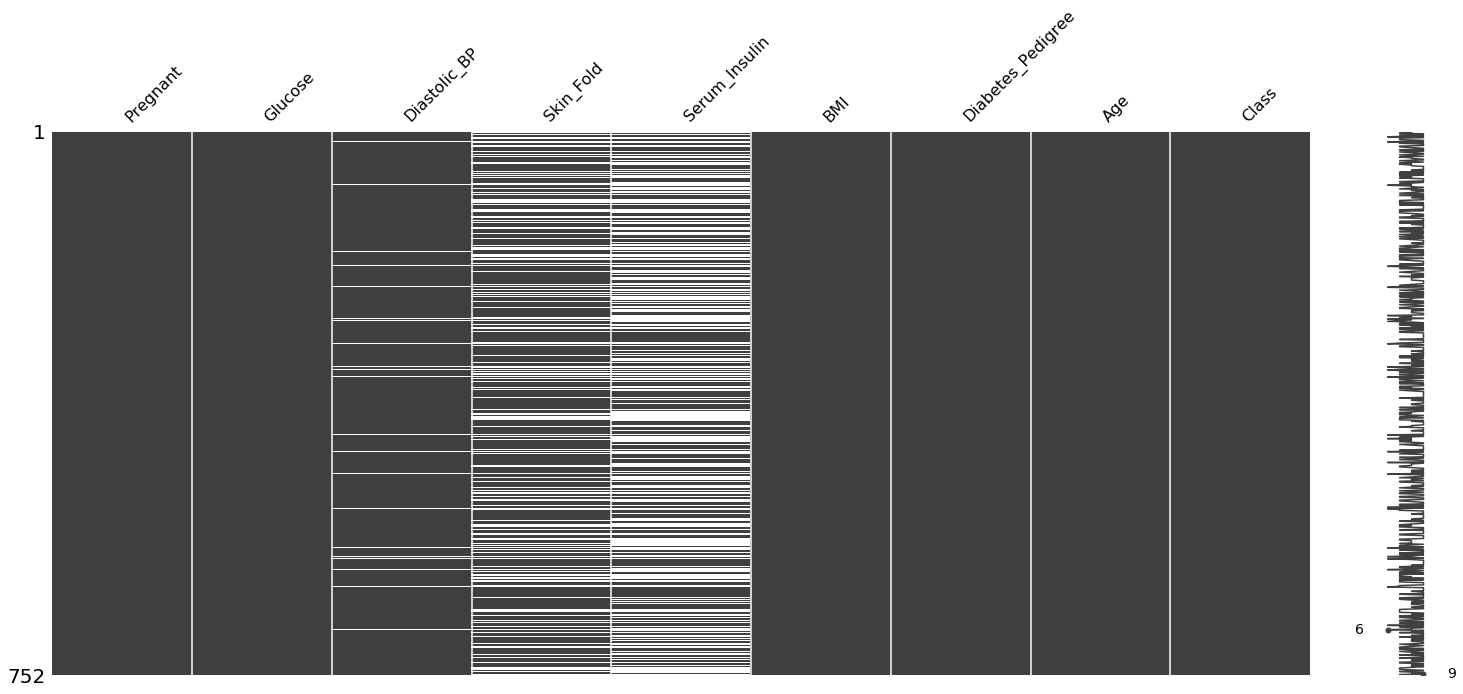

In [57]:
# Visualize the missingness of diabetes pre-dropping missing values
msno.matrix(diabetes)

# Print the number of missing values in Glucose
print(diabetes.Glucose.isnull().sum())

0


'/usr/local/share/datasets/glucose_dropped.png'

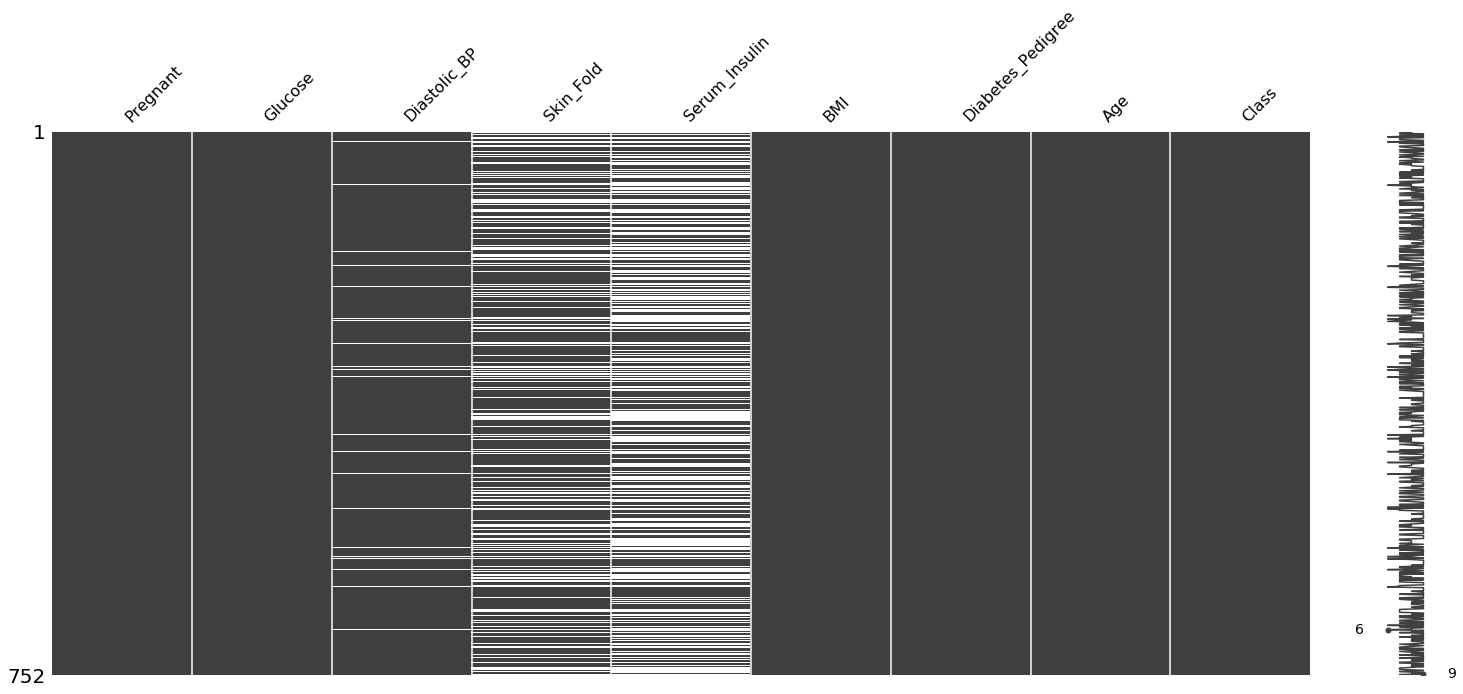

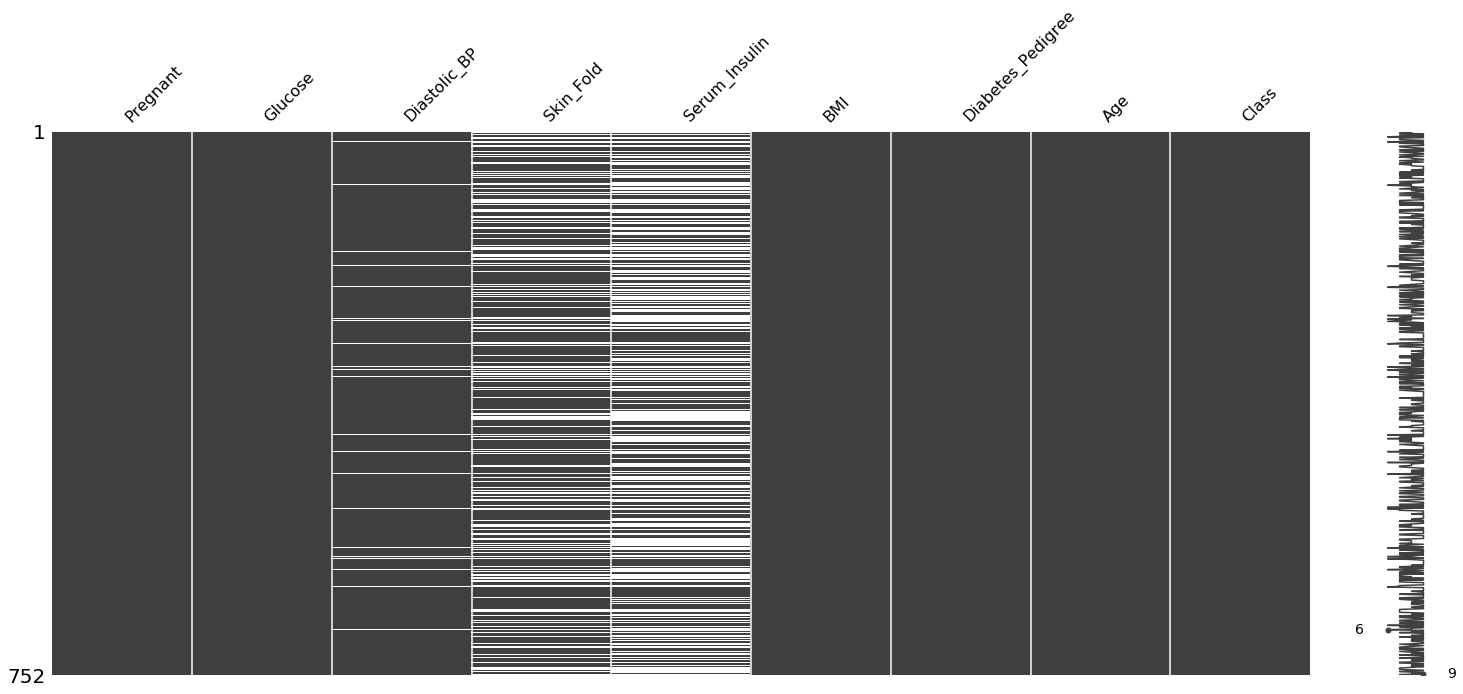

In [58]:
# Visualize the missingness of diabetes pre-dropping missing values
msno.matrix(diabetes)

# Print the number of missing values in Glucose
print(diabetes['Glucose'].isnull().sum())

# Drop rows where 'Glucose' has a missing value
diabetes.dropna(subset=["Glucose"], how='all', inplace=True)

# Visualize the missingness of diabetes after-dropping missing values
msno.matrix(diabetes)

display("/usr/local/share/datasets/glucose_dropped.png")

'/usr/local/share/datasets/matrix_diabetes.png'

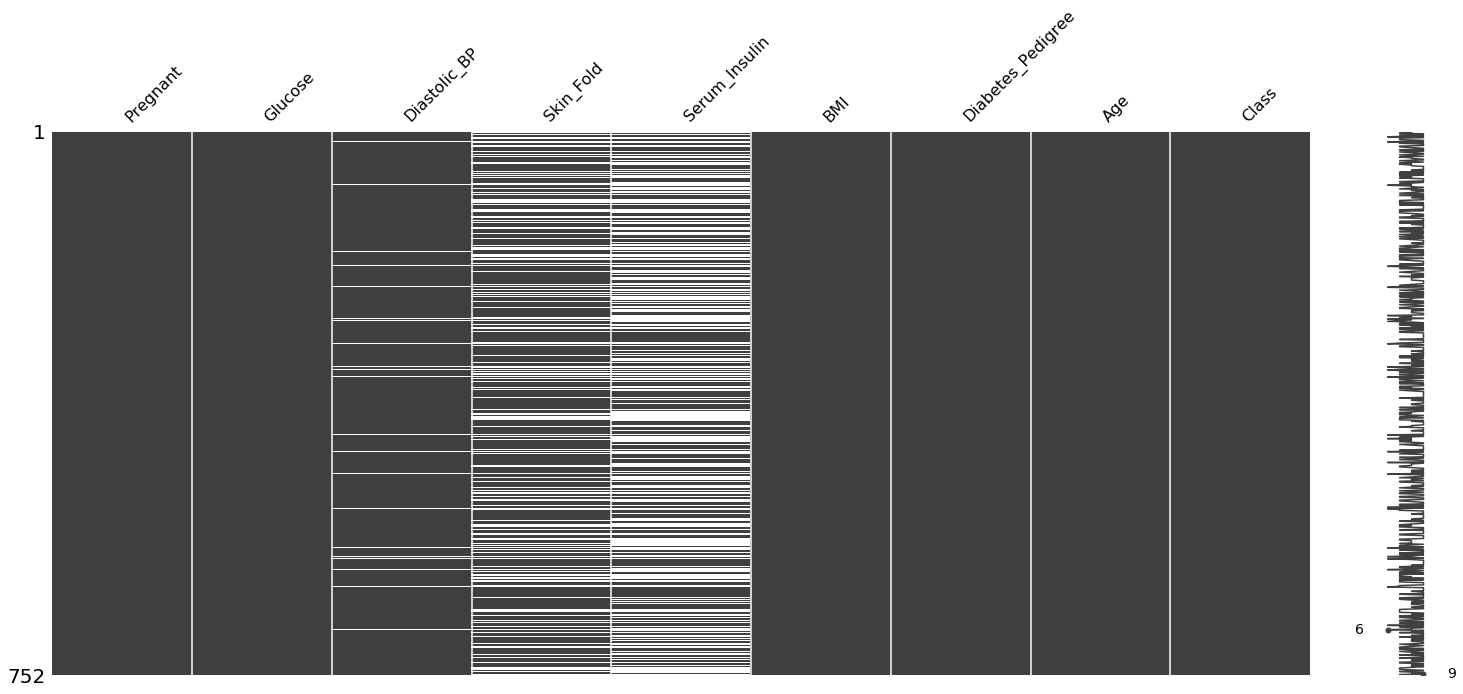

In [59]:
# Visualize the missingness in the data
msno.matrix(diabetes)

# Display nullity matrix
display("/usr/local/share/datasets/matrix_diabetes.png")

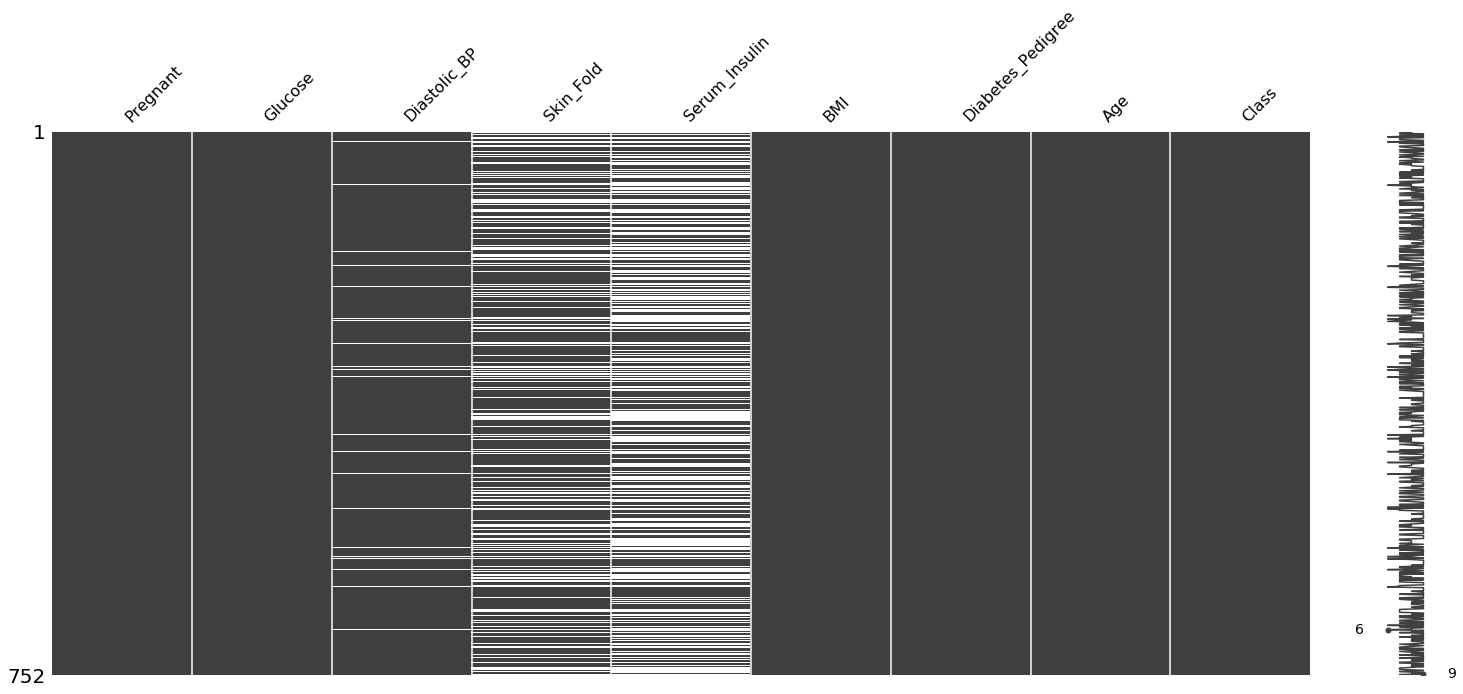

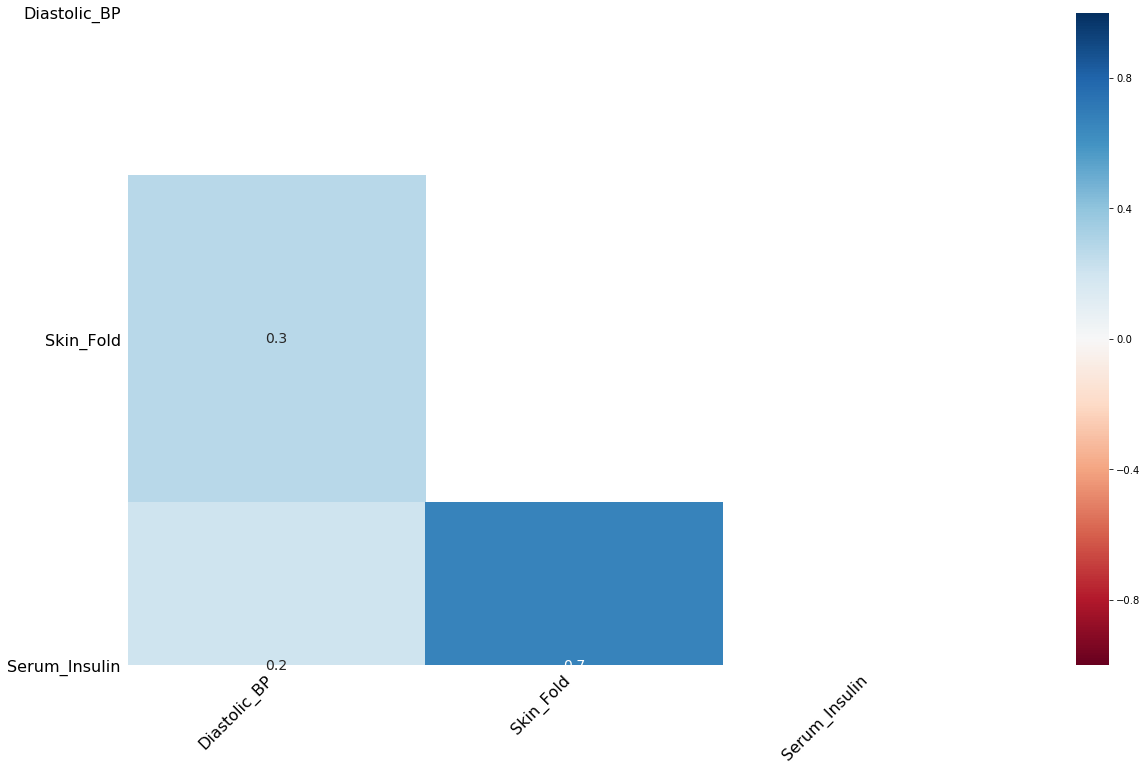

In [60]:
# Visualize the missingness in the data
msno.matrix(diabetes)

# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

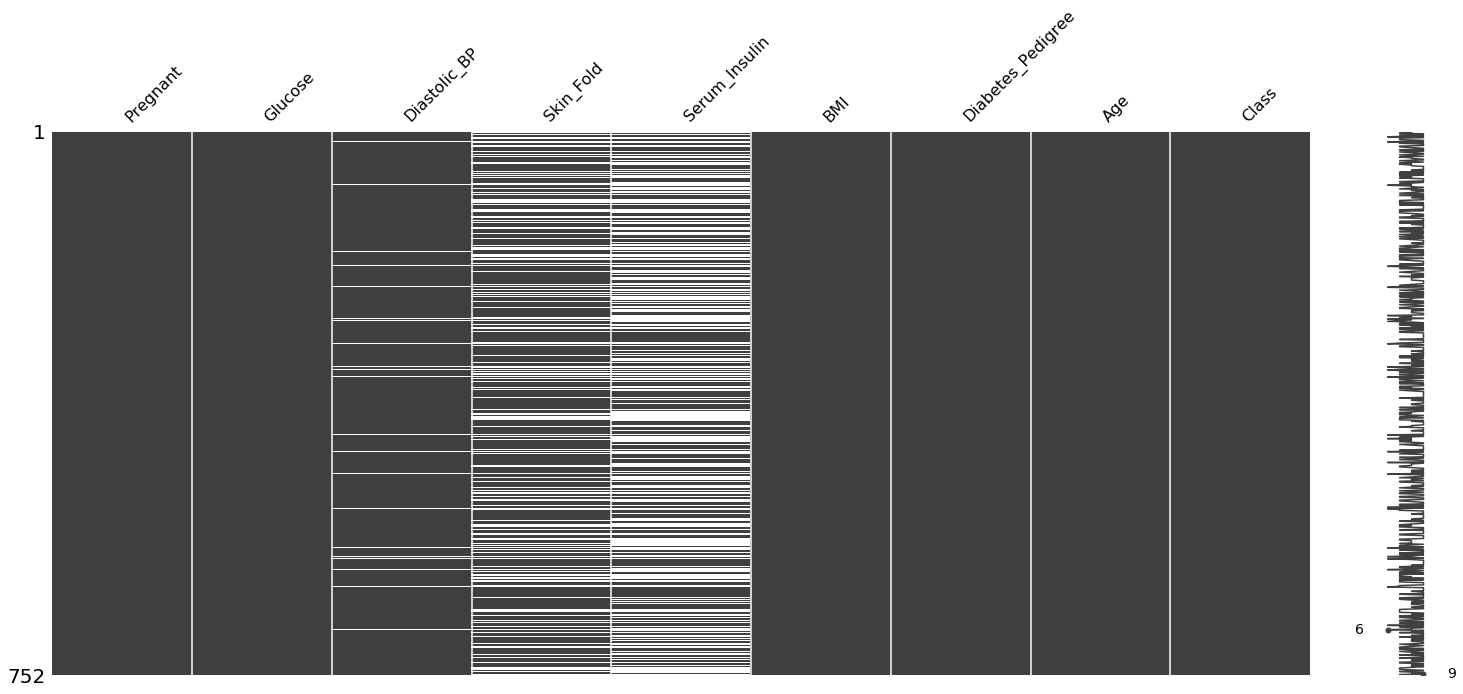

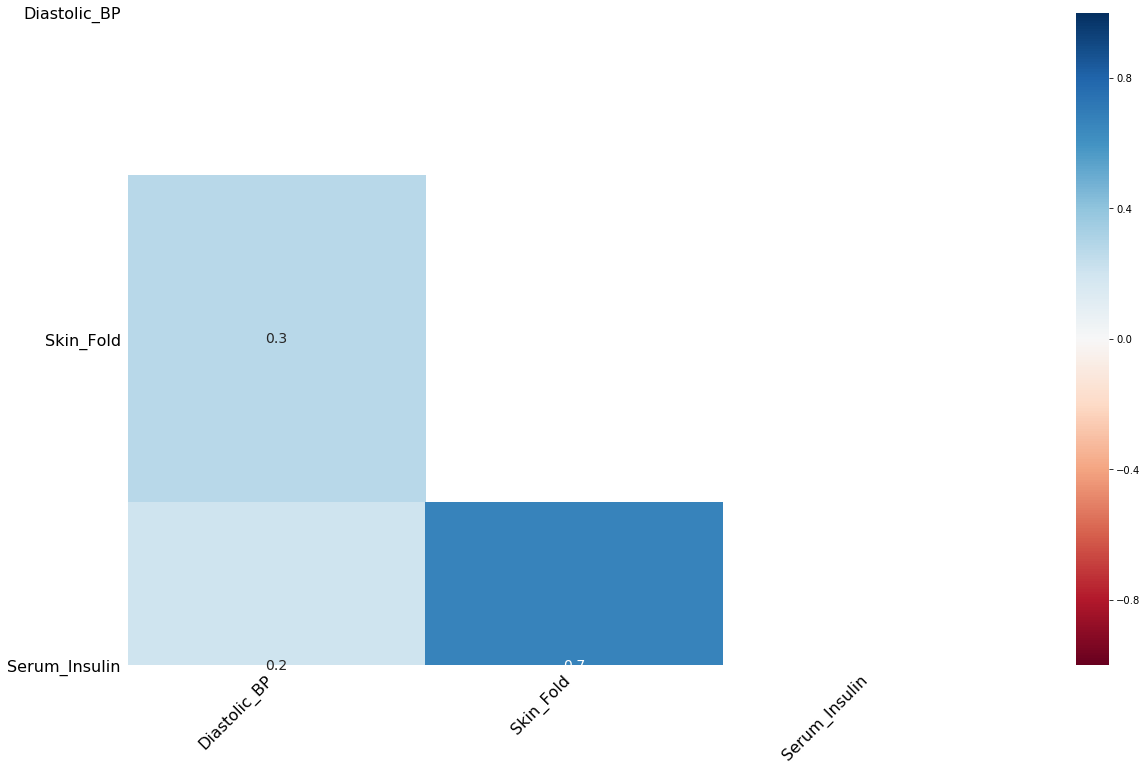

In [61]:
# Visualize the missingness in the data
msno.matrix(diabetes)

# Visualize the correlation of missingness between variables
msno.heatmap(diabetes)

# Show heatmap
plt.show()

# Drop rows where 'Glucose' has a missing value
diabetes.dropna(subset=['Glucose'], how='all', inplace=True)

#### Summary
- Pairwise deletion
- Listwise deletion
- Deletion is used only when values are MCAR

# 3. Imputation Techniques
#### Mean, median & mode imputations
##### Basic imputation techniques
- constant (e.g. 0)
- mean
- median
- mode or most frequent

##### Mean Imputation

In [62]:
from sklearn.impute import SimpleImputer

diabetes_mean = diabetes.copy(deep=True)
mean_imputer = SimpleImputer(strategy='mean')
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)

##### Median Imputation

In [63]:
diabetes_median = diabetes.copy(deep=True)
median_imputer = SimpleImputer(strategy='median')
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)

##### Mode Imputation

In [64]:
diabetes_mode = diabetes.copy(deep=True)
mode_imputer = SimpleImputer(strategy='most_frequent')
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)

##### Imputing a constant

In [65]:
diabetes_constant = diabetes.copy(deep=True)
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
diabetes_constant.iloc[:, :] = constant_imputer.fit_transform(diabetes_constant)

#### Scatterplot of imputation

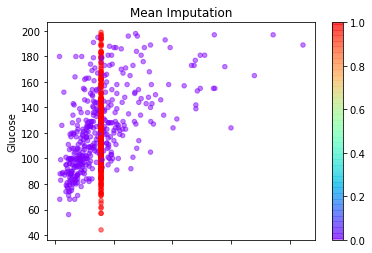

In [66]:
nullity = diabetes['Serum_Insulin'].isnull()+diabetes['Glucose'].isnull()

diabetes_mean.plot(x='Serum_Insulin', y='Glucose', kind='scatter', alpha=0.5, 
                   c=nullity, cmap='rainbow', title='Mean Imputation')

#### Visualizing imputations

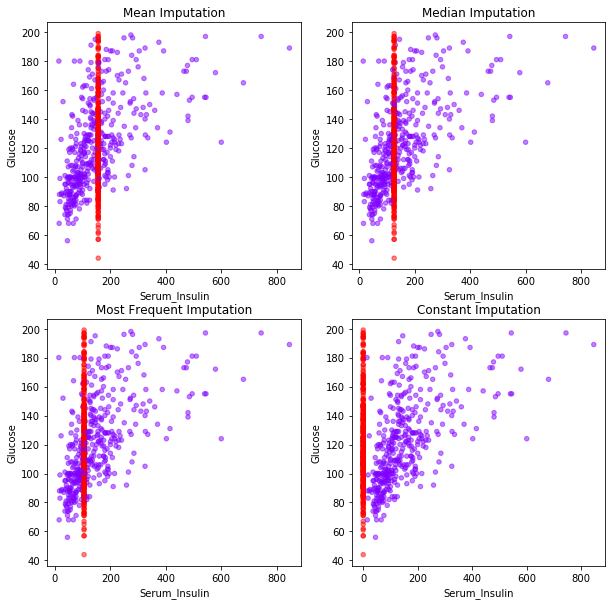

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
nullity = diabetes['Serum_Insulin'].isnull()+diabetes['Glucose'].isnull()

imputations = {'Mean Imputation': diabetes_mean,
               'Median Imputation': diabetes_median,
               'Most Frequent Imputation': diabetes_mode,
               'Constant Imputation': diabetes_constant}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Serum_Insulin', y='Glucose', kind='scatter',
    alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
    colorbar=False, title=df_key)

#### Summary
You learned to
- Impute with statistical parameters like mean, median and mode
- Graphically compare the imputations
- Analyze the imputations

##### Imputing time-series data

In [68]:
airquality = pd.read_csv('data/air-quality.csv', index_col='Date')
airquality.index = pd.to_datetime(airquality.index)
airquality.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


In [69]:
airquality.isnull().sum()

Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [70]:
airquality.isnull().mean() * 100

Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64

##### The .fillna() method
The attribute method in .fillna() can be set to
- 'ffill' or 'pad'
- 'bfill' or 'backwardfill'

###### Ffill method
- Replace NaN s with last observed value
- pad is the same as 'ffill'

In [71]:
airquality['Ozone'][30:40]

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64

In [72]:
airquality.fillna(method='ffill')['Ozone'][30:40]

Date
1976-05-31    37.0
1976-06-01    37.0
1976-06-02    37.0
1976-06-03    37.0
1976-06-04    37.0
1976-06-05    37.0
1976-06-06    37.0
1976-06-07    29.0
1976-06-08    29.0
1976-06-09    71.0
Name: Ozone, dtype: float64

###### Bfill method
- Replace NaN s with next observed value
- backfill is the same as 'bfill'

In [73]:
airquality['Ozone'][30:40]

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64

In [74]:
airquality.fillna(method='bfill')['Ozone'][30:40]

Date
1976-05-31    37.0
1976-06-01    29.0
1976-06-02    29.0
1976-06-03    29.0
1976-06-04    29.0
1976-06-05    29.0
1976-06-06    29.0
1976-06-07    29.0
1976-06-08    71.0
1976-06-09    71.0
Name: Ozone, dtype: float64

##### The `.interpolate()` method
- The `.interpolate()` method extends the sequence of values to the missing values
The attribute method in `.interpolate()` can be set to
  - 'linear'
  - 'quadrtic'
  - 'nearest'
  
##### Linear interpolation
- Impute linearly or with equidistant values
<img style="width: 150px;" src="img/linear interpolation.png">

In [78]:
airquality.interpolate(method='linear')['Ozone'][30:40]

Date
1976-05-31    37.000000
1976-06-01    35.857143
1976-06-02    34.714286
1976-06-03    33.571429
1976-06-04    32.428571
1976-06-05    31.285714
1976-06-06    30.142857
1976-06-07    29.000000
1976-06-08    50.000000
1976-06-09    71.000000
Name: Ozone, dtype: float64

###### Quadratic interpolation
- Impute the values quadratically
<img style="width: 150px;" src="img/quadratic interpolation.png">

In [79]:
airquality['Ozone'][30:40]

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64

In [82]:
airquality.interpolate(method='quadratic')['Ozone'][30:40]

Date
1976-05-31    37.000000
1976-06-01   -38.361123
1976-06-02   -79.352735
1976-06-03   -85.974836
1976-06-04   -62.354606
1976-06-05   -33.255133
1976-06-06    -2.803598
1976-06-07    29.000000
1976-06-08    62.155660
1976-06-09    71.000000
Name: Ozone, dtype: float64

###### Nearest value imputation
- Impute with the nearest observable value
<img style="width: 150px;" src="img/nearest value imputation.png">

In [83]:
airquality['Ozone'][30:40]

Date
1976-05-31    37.0
1976-06-01     NaN
1976-06-02     NaN
1976-06-03     NaN
1976-06-04     NaN
1976-06-05     NaN
1976-06-06     NaN
1976-06-07    29.0
1976-06-08     NaN
1976-06-09    71.0
Name: Ozone, dtype: float64

In [84]:
airquality.interpolate(method='nearest')['Ozone'][30:40]

Date
1976-05-31    37.0
1976-06-01    37.0
1976-06-02    37.0
1976-06-03    37.0
1976-06-04    29.0
1976-06-05    29.0
1976-06-06    29.0
1976-06-07    29.0
1976-06-08    29.0
1976-06-09    71.0
Name: Ozone, dtype: float64

#### Visualizing timeseries imputations
###### Air quality time-series plot

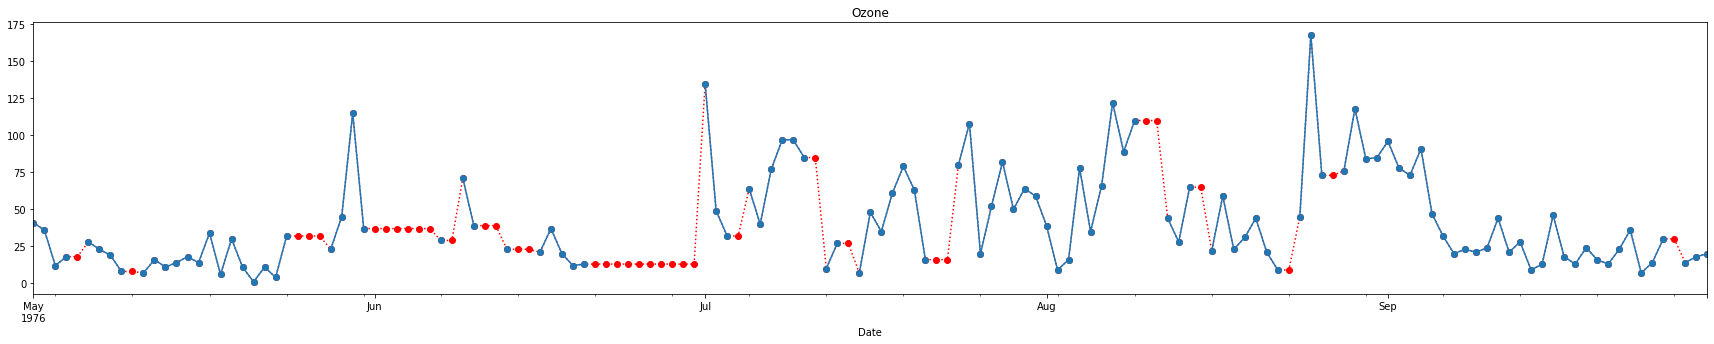

In [85]:
# Impute airquality DataFrame with ffill method
ffill_imputed = airquality.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

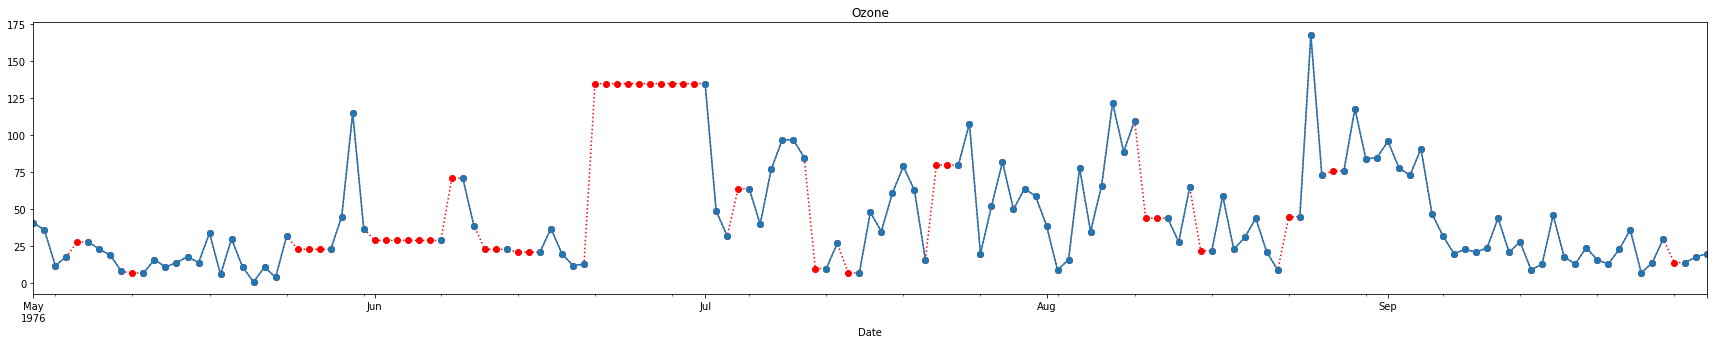

In [86]:
# Impute airquality DataFrame with bfill method
bfill_imputed = airquality.fillna(method='bfill')

# Plot the imputed DataFrame bfill_imp in red dotted style 
bfill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

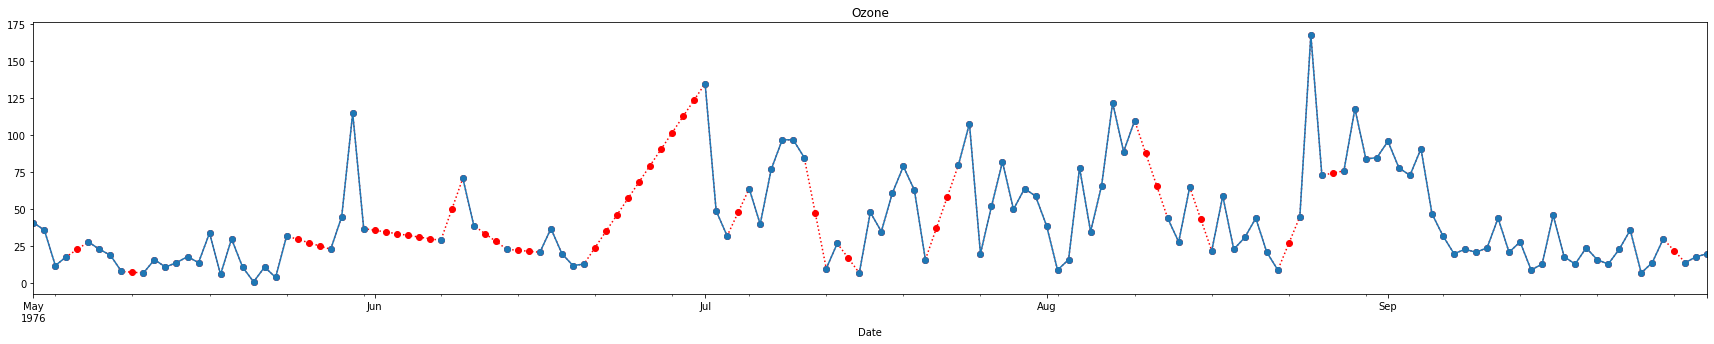

In [87]:
# Impute airquality DataFrame with linear interpolate method
linear_interp = airquality.interpolate(method='linear')

# Plot the imputed DataFrame linear_interp in red dotted style 
linear_interp['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

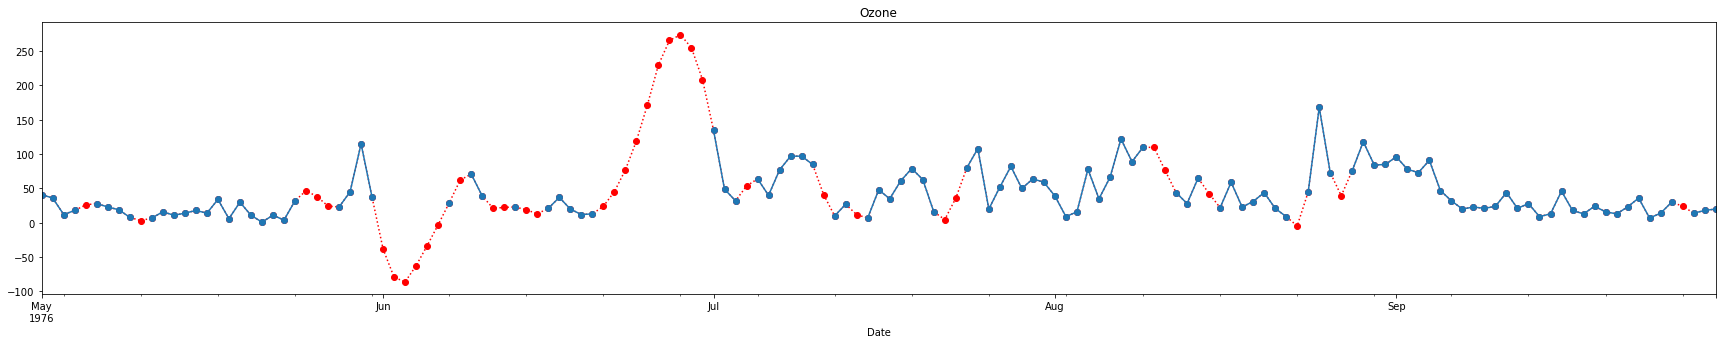

In [88]:
# Impute airquality DataFrame with quadratic interpolate method
quadratic_interp = airquality.interpolate(method='quadratic')

# Plot the imputed DataFrame linear_interp in red dotted style 
quadratic_interp['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

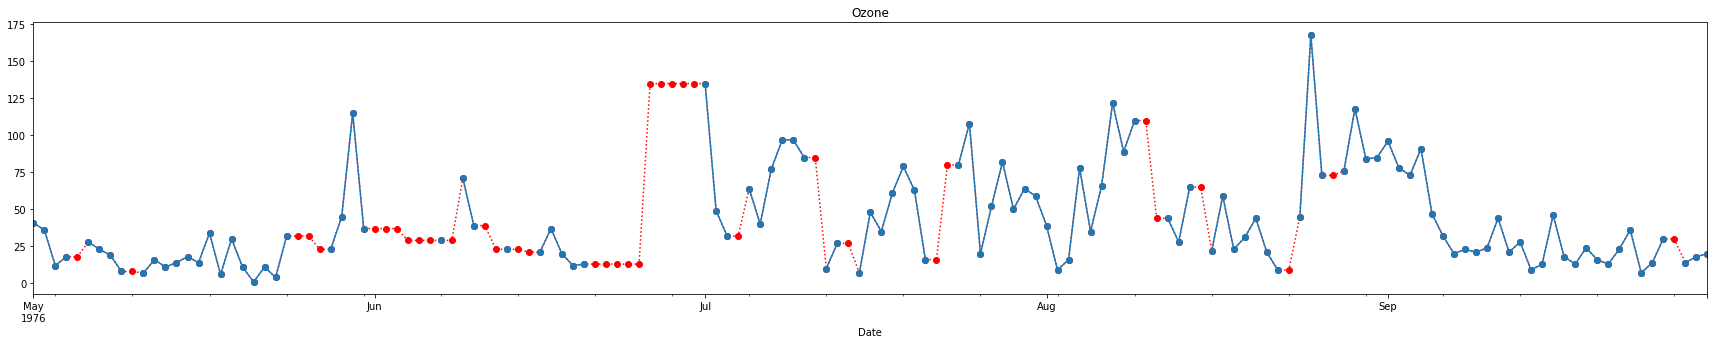

In [89]:
# Impute airquality DataFrame with nearest interpolate method
nearest_interp = airquality.interpolate(method='nearest')

# Plot the imputed DataFrame nearest_interp in red dotted style 
nearest_interp['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))

# Plot the airquality DataFrame with title
airquality['Ozone'].plot(title='Ozone', marker='o', figsize=(30, 5))

plt.show()

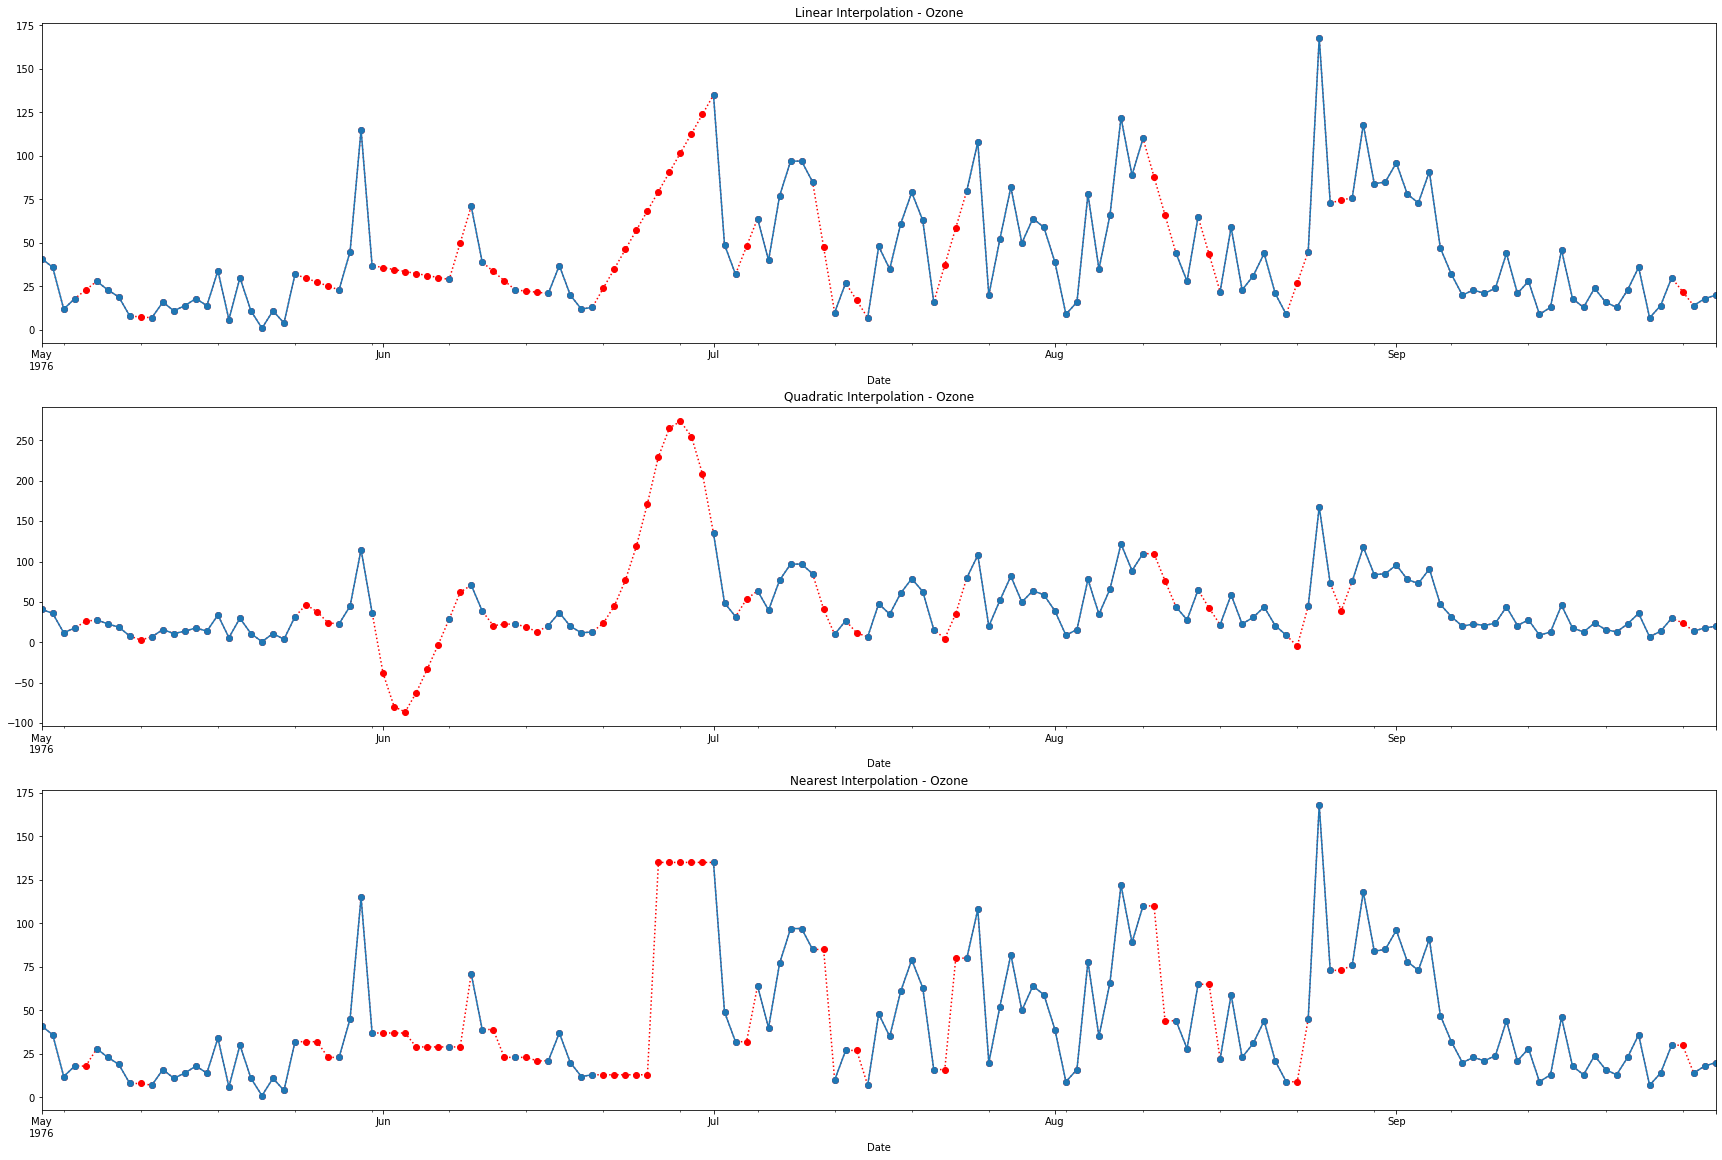

In [90]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(30, 20))

# Create interpolations dictionary
interpolations = {'Linear Interpolation': linear_interp, 
                  'Quadratic Interpolation': quadratic_interp, 
                  'Nearest Interpolation': nearest_interp}

# Visualize each interpolation
for ax, df_key in zip(axes, interpolations):
    interpolations[df_key].Ozone.plot(color='red', marker='o',
    linestyle='dotted', ax=ax)
    airquality.Ozone.plot(title=df_key + ' - Ozone', marker='o', ax=ax)

##### Summary
- Time-series plot of imputed DataFrame
- Comparison of imputations

# 4. Imputing using fancyimpute
###### fancyimpute package
- Package contains advanced techniques
- Uses machine learning algorithms to impute missing values
- Uses other columns to predict the missing values and impute them

###### Fancyimpute imputation techniques
- KNN or K-Nearest Neighbor
- MICE or Multiple Imputation by Chained Equations

###### K-Nearest Neighbor Imputation
- Select K nearest or similar data points using all the non-missing features
- Take average of the selected data points to
<img style="width: 350px;" src="img/KNN Classification.png">

In [92]:
# K-Nearest Neighbor Imputation
from fancyimpute import KNN
knn_imputer = KNN()
diabetes_knn = diabetes.copy(deep=True)
diabetes_knn.iloc[:, :] = knn_imputer.fit_transform(diabetes_knn)

###### Multiple Imputations by Chained Equations (MICE)
- Perform multiple regressions over random sample of the data
- Take average of the multiple regression values
- Impute the missing feature value for the data point

In [233]:
# Multiple Imputations by Chained Equations(MICE)
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
diabetes_MICE = diabetes.copy(deep=True)
diabetes_MICE.iloc[:, :] = MICE_imputer.fit_transform(diabetes_MICE)

#### Summary
- Using Machine Learning techniques to impute missing values
- KNN finds most similar points for imputing
- MICE performs multiple regression for imputing
- MICE is a very robust model for imputation

#### Imputing categorical values
###### Complexity with categorical values
- Most categorical values are strings
- Cannot perform operations on strings
- Necessity to convert/encode strings to numeric values and impute